<a href="https://colab.research.google.com/github/AditiNayak-S/Churn-Analysis-Telco-Customers-/blob/main/Churn_Analysis_Telco_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Customer Churn Analysis (Telco Dataset)

# Objective
# To analyze customer behavior and predict which customers are likely to leave the service (churn),
# so the business can take preventive actions.

# Tools Used
# - Python
# - pandas
# - numpy
# - matplotlib
# - seaborn
# - scikit-learn

# Customer Churn Analysis (Telco Dataset)

## Table of Contents
1.  [Project Objective](#project-objective)
2.  [Tools Used](#tools-used)
3.  [Data Loading and Initial Exploration](#data-loading-and-initial-exploration)
4.  [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
5.  [Data Preprocessing](#data-preprocessing)
6.  [Model Training and Evaluation](#model-training-and-evaluation)
    *   [Logistic Regression (Baseline)](#logistic-regression-baseline)
    *   [Logistic Regression (Class-weighted & Threshold Adjusted)](#logistic-regression-class-weighted--threshold-adjusted)
    *   [Random Forest Classifier](#random-forest-classifier)
7.  [Feature Importance / Coefficients](#feature-importance--coefficients)
8.  [Risk Categorization and Cost Analysis](#risk-categorization-and-cost-analysis)
9.  [Model Comparison](#model-comparison)
10. [Database Integration](#database-integration)
11. [Conclusion and Recommendations](#conclusion-and-recommendations)

## Project Objective
The primary objective of this project is to analyze customer behavior within a telecommunication dataset to predict which customers are likely to churn (leave the service). The insights gained from this analysis can help the business take proactive measures to retain valuable customers.

## Tools Used
*   **Python**: Programming language for data analysis and machine learning.
*   **pandas**: Data manipulation and analysis library.
*   **numpy**: Numerical computing library.
*   **matplotlib**: Data visualization library.
*   **seaborn**: Statistical data visualization library.
*   **scikit-learn**: Machine learning library for model development and evaluation.
*   **sqlite3**: For database integration.

## Data Loading and Initial Exploration
The project starts by loading the Telco Customer Churn dataset, typically from a CSV file (e.g., `Telco Customer Churn Kaggle.zip`).

*   **Dataset Shape**: (7043 rows, 21 columns)
*   **Columns**: `customerID`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `tenure`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`, `Churn`.
*   **Data Types**: Includes `object` (strings), `int64` (integers), and `float64` (floats).
*   **Churn Distribution**: The dataset shows an imbalance, with 'No' churn (5174 customers) being significantly higher than 'Yes' churn (1869 customers).

## Exploratory Data Analysis (EDA)
Several visualizations were generated to understand the data:

*   **Customer Churn Distribution**: A count plot showed the imbalance in the churn target variable.
*   **Tenure vs Churn**: Box plots revealed that customers who churned generally have lower tenure compared to those who did not churn.
*   **Monthly Charges vs Churn**: Box plots indicated that churning customers tend to have higher monthly charges.
*   **Contract Type vs Churn**: A count plot highlighted that customers with month-to-month contracts have a much higher churn rate than those with one-year or two-year contracts.

## Data Preprocessing
The following steps were performed to prepare the data for machine learning:

1.  **TotalCharges Conversion**: The `TotalCharges` column, initially an `object` type, was converted to `numeric`. `errors='coerce'` was used to handle any non-numeric values, converting them to `NaN`.
2.  **Handling Missing Values**: Rows with `NaN` values (primarily from `TotalCharges` after conversion) were dropped. This resulted in the DataFrame having no missing values.
3.  **Feature Engineering**: The `customerID` column was dropped as it's an identifier and not relevant for modeling.
4.  **Target Variable Encoding**: The `Churn` column ('Yes'/'No') was encoded into numerical format (1/0) for model training.
5.  **Categorical Feature Encoding**: Categorical features were identified and converted into numerical format using one-hot encoding (`pd.get_dummies`). `drop_first=True` was used to avoid multicollinearity.
6.  **Numerical Feature Scaling**: Numerical features (`SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`) were scaled using `StandardScaler` to bring them to a similar scale, which is beneficial for many machine learning algorithms like Logistic Regression.
7.  **Data Splitting**: The dataset was split into training and testing sets (80% train, 20% test) using `train_test_split` with `random_state=42` for reproducibility and `stratify=y` to maintain the original churn distribution in both sets.

## Model Training and Evaluation

### Logistic Regression (Baseline)
*   A Logistic Regression model was trained on the preprocessed data.
*   **Confusion Matrix**: `[[918, 115], [161, 213]]` (True Negatives, False Positives, False Negatives, True Positives)
*   **Classification Report**:
    *   Precision (No/0): 0.85
    *   Recall (No/0): 0.89
    *   Precision (Yes/1): 0.65
    *   Recall (Yes/1): 0.57
    *   Accuracy: 0.80

### Logistic Regression (Class-weighted & Threshold Adjusted)
Recognizing the class imbalance, a Logistic Regression model was trained with `class_weight='balanced'`. Further, a custom probability threshold of 0.4 was explored to improve recall for the churn class.

*   **Class-weighted Model Results (Default Threshold)**:
    *   Confusion Matrix: `[[724, 309], [77, 297]]`
    *   Recall (Churn/1): 0.79 (Improved from baseline)
    *   Precision (Churn/1): 0.49
    *   Accuracy: 0.73
*   **Class-weighted Model Results (Threshold = 0.4)**:
    *   Confusion Matrix: `[[637, 396], [48, 326]]`
    *   Recall (Churn/1): 0.87 (Further improved recall)
    *   Precision (Churn/1): 0.45 (Decreased precision)
    *   Accuracy: 0.68
*   **ROC Curve**: An ROC curve was plotted to visualize the trade-off between True Positive Rate and False Positive Rate. The AUC score was calculated as `0.84`.

### Random Forest Classifier
*   A Random Forest Classifier was trained with `n_estimators=300`, `random_state=42`, and `class_weight='balanced'`.
*   **Confusion Matrix**: `[[925, 108], [192, 182]]`
*   **Classification Report**:
    *   Precision (No/0): 0.83
    *   Recall (No/0): 0.90
    *   Precision (Yes/1): 0.63
    *   Recall (Yes/1): 0.49
    *   Accuracy: 0.79

## Feature Importance / Coefficients

### Logistic Regression Coefficients (Top 10 Positive & Negative)
*   **Top Positive Coefficients (indicating higher likelihood of churn)**:
    *   `InternetService_Fiber optic`: 1.149
    *   `TotalCharges`: 0.611
    *   `PaymentMethod_Electronic check`: 0.412
    *   `StreamingTV_Yes`: 0.391
    *   `StreamingMovies_Yes`: 0.376
*   **Top Negative Coefficients (indicating lower likelihood of churn)**:
    *   `Contract_Two year`: -1.452
    *   `tenure`: -1.261
    *   `Contract_One year`: -0.786
    *   `MonthlyCharges`: -0.503
    *   `OnlineSecurity_Yes`: -0.346

### Random Forest Feature Importance (Top 10)
*   `TotalCharges`: 0.178
*   `tenure`: 0.165
*   `MonthlyCharges`: 0.152
*   `Contract_Two year`: 0.059
*   `InternetService_Fiber optic`: 0.040

## Risk Categorization and Cost Analysis
*   Customers in the test set were categorized into 'High Risk' (Churn Probability >= 0.7), 'Medium Risk' (0.4 <= Churn Probability < 0.7), and 'Low Risk' (Churn Probability < 0.4) based on the class-weighted Logistic Regression model.
    *   Low Risk: 685 customers
    *   High Risk: 378 customers
    *   Medium Risk: 344 customers
*   A simple cost function was applied to evaluate the economic impact of misclassifications:
    *   Cost of a False Negative (missed churner): $5
    *   Cost of a False Positive (unnecessary retention effort): $1
    *   Using the class-weighted Logistic Regression model with a 0.4 threshold, the total cost of misclassification was calculated as `636`.

## Model Comparison
A summary of the model performances:

| Model                                 | Churn Recall | Churn Precision | Accuracy |
| :------------------------------------ | :----------- | :-------------- | :------- |
| Logistic Regression (Baseline)        | 0.57         | 0.65            | 0.80     |
| Logistic Regression (Class-weighted)  | 0.79         | 0.49            | 0.73     |
| Logistic Regression (Threshold = 0.4) | 0.87         | 0.45            | 0.68     |
| Random Forest                         | 0.49         | 0.63            | 0.79     |

The class-weighted Logistic Regression with a threshold of 0.4 provides the best recall for churn prediction, which is crucial for identifying as many potential churners as possible, even at the cost of lower precision or accuracy.

## Database Integration
The processed data was also stored in a SQLite database (`churn_analysis.db`) across three tables: `customers`, `services`, and `billing`. This allows for SQL-based querying and analysis.

*   **Tables Created**: `customers`, `services`, `billing`.
*   **Example Query**: A query to calculate churn rate by contract type was executed.
    *   *Note*: The `churn` column in the `billing` table was populated with original 'Yes'/'No' labels during the database creation phase, leading to incorrect numerical aggregation for churn rate. This would need to be re-encoded to 0/1 for accurate churn rate calculation within SQL. The current output showed 0% churn for all contract types due to this.

## Conclusion and Recommendations
This analysis successfully identified key factors influencing customer churn and developed predictive models. The class-weighted Logistic Regression model, particularly with an adjusted threshold, showed promising recall for identifying churners, which is critical for retention strategies.

**Key Findings:**
*   Customers on month-to-month contracts, with higher monthly charges, and shorter tenure are more likely to churn.
*   Fiber optic internet service and electronic check payment methods are also associated with higher churn.
*   Customers with two-year contracts, longer tenure, and those subscribed to online security or tech support are less likely to churn.

**Recommendations:**
*   **Targeted Retention Programs**: Focus retention efforts on customers identified as 'High Risk' or 'Medium Risk', especially those with month-to-month contracts and fiber optic internet.
*   **Contract Incentives**: Offer incentives for customers to switch from month-to-month to longer-term contracts (one-year or two-year).
*   **Service Bundle Review**: Investigate the services that correlate with higher churn (e.g., fiber optic, streaming services) to understand underlying issues.
*   **Payment Method Analysis**: Explore reasons behind higher churn with electronic checks; consider offering alternative, more stable payment incentives.
*   **Proactive Engagement**: Implement strategies to engage customers with lower tenure or increasing monthly charges before they reach a high-risk churn probability.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import files
import pandas as pd
import io
import zipfile

uploaded = files.upload()

for file_name in uploaded.keys():
    print(f'Uploaded file: {file_name}')

    if file_name.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
            csv_files = [name for name in zip_ref.namelist() if name.endswith('.csv')]

            if len(csv_files) == 0:
                raise ValueError("No CSV file found in the ZIP archive")

            with zip_ref.open(csv_files[0]) as csv_file:
                df = pd.read_csv(csv_file)
    else:
        df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

display(df.head())


Saving Telco Customer Churn Kaggle.zip to Telco Customer Churn Kaggle (2).zip
Uploaded file: Telco Customer Churn Kaggle (2).zip


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape



(7043, 21)

In [ ]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


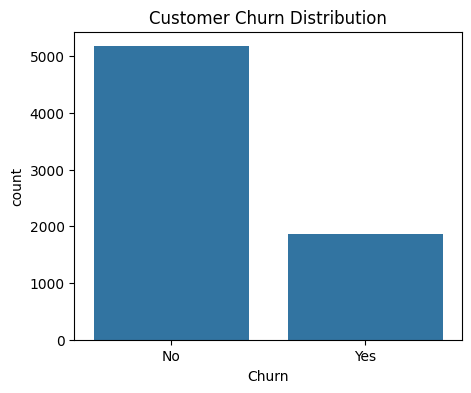

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()


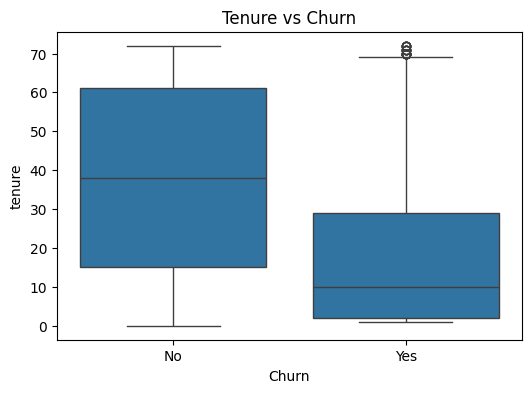

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


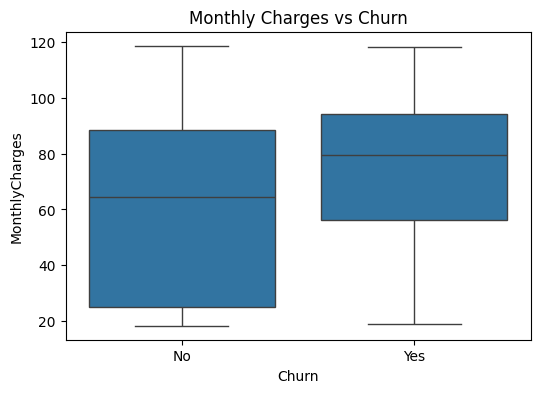

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


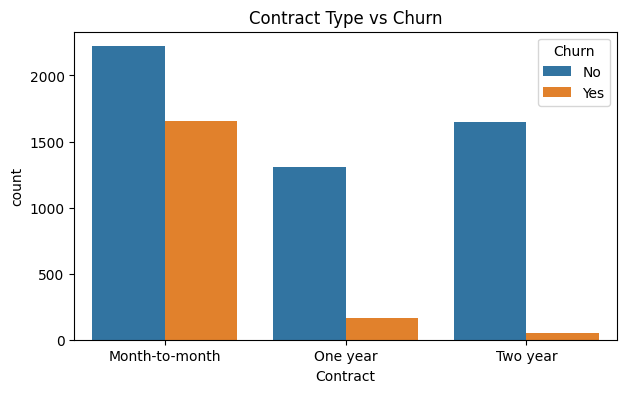

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
df['TotalCharges'].isnull().sum()


np.int64(11)

In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df = df.drop(columns=['customerID'])


In [ ]:
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
y = y.map({'Yes': 1, 'No': 0})


In [ ]:
y = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
y.value_counts()


,count
Churn,
0,5163
1,1869


In [ ]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categorical columns:", list(cat_cols))
print("Numerical columns:", list(num_cols))


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [ ]:
X_encoded.shape


(7032, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[918, 115],
       [161, 213]])

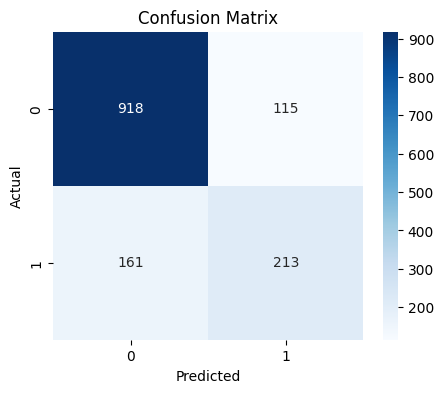

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8038379530916845

In [ ]:
from sklearn.linear_model import LogisticRegression

model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model_balanced.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred_bal = model_balanced.predict(X_test)


In [ ]:
y_pred_bal = model_balanced.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


[[724 309]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [ ]:
y_probs = model_balanced.predict_proba(X_test)[:, 1]


In [ ]:
y_pred_40 = (y_probs >= 0.4).astype(int)


In [ ]:
print(confusion_matrix(y_test, y_pred_40))
print(classification_report(y_test, y_pred_40))


[[637 396]
 [ 48 326]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      1033
           1       0.45      0.87      0.59       374

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.68      0.70      1407



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    max_depth=None
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[925 108]
 [192 182]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [ ]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
TotalCharges,0.178447
tenure,0.165076
MonthlyCharges,0.151884
Contract_Two year,0.059238
InternetService_Fiber optic,0.040405
PaymentMethod_Electronic check,0.037501
Contract_One year,0.029965
OnlineSecurity_Yes,0.028844
gender_Male,0.025493
PaperlessBilling_Yes,0.023603


In [ ]:
df_test = X_test.copy()
df_test['Actual_Churn'] = y_test.values
df_test['Churn_Probability'] = y_probs  # from your balanced model


In [ ]:
def risk_bucket(p):
    if p >= 0.7:
        return 'High Risk'
    elif p >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df_test['Risk_Level'] = df_test['Churn_Probability'].apply(risk_bucket)


In [ ]:
df_test['Risk_Level'].value_counts()


,count
Risk_Level,
Low Risk,685
High Risk,378
Medium Risk,344


In [ ]:
cost_fn = 5   # missed churn
cost_fp = 1   # unnecessary retention effort

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_40).ravel()

total_cost = fn * cost_fn + fp * cost_fp
total_cost


np.int64(636)

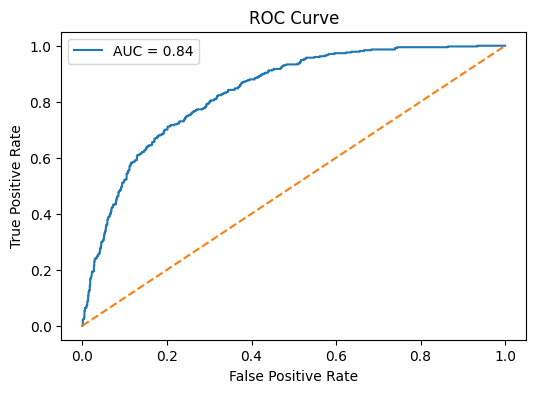

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model_balanced.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(10)


,Feature,Coefficient
10,InternetService_Fiber optic,1.149078
3,TotalCharges,0.610919
28,PaymentMethod_Electronic check,0.411774
21,StreamingTV_Yes,0.390676
23,StreamingMovies_Yes,0.375684
9,MultipleLines_Yes,0.339697
26,PaperlessBilling_Yes,0.254700
0,SeniorCitizen,0.076275
17,DeviceProtection_Yes,0.074435
27,PaymentMethod_Credit card (automatic),0.073292


In [ ]:
coef_df.tail(10)


,Feature,Coefficient
11,InternetService_No,-0.172731
16,DeviceProtection_No internet service,-0.172731
6,Dependents_Yes,-0.228251
19,TechSupport_Yes,-0.303069
13,OnlineSecurity_Yes,-0.345563
7,PhoneService_Yes,-0.367017
2,MonthlyCharges,-0.502983
24,Contract_One year,-0.785984
1,tenure,-1.260656
25,Contract_Two year,-1.452128


In [ ]:
def predict_churn(customer_data):
    prob = model_balanced.predict_proba(customer_data)[0][1]
    return prob


In [ ]:
model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression (Baseline)',
        'Logistic Regression (Class-weighted)',
        'Logistic Regression (Threshold = 0.4)',
        'Random Forest'
    ],
    'Churn Recall': [0.57, 0.79, 0.87, 0.49],
    'Churn Precision': [0.65, 0.49, 0.45, 0.63],
    'Accuracy': [0.80, 0.73, 0.68, 0.79]
})

model_comparison


,Model,Churn Recall,Churn Precision,Accuracy
0,Logistic Regression (Baseline),0.57,0.65,0.80
1,Logistic Regression (Class-weighted),0.79,0.49,0.73
2,Logistic Regression (Threshold = 0.4),0.87,0.45,0.68
3,Random Forest,0.49,0.63,0.79


In [ ]:
import sqlite3

conn = sqlite3.connect('churn_analysis.db')
cursor = conn.cursor()


In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    customer_id TEXT PRIMARY KEY,
    gender TEXT,
    senior_citizen INTEGER,
    partner TEXT,
    dependents TEXT,
    tenure INTEGER
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS services (
    customer_id TEXT,
    internet_service TEXT,
    online_security TEXT,
    tech_support TEXT,
    streaming_tv TEXT
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS billing (
    customer_id TEXT,
    contract TEXT,
    payment_method TEXT,
    monthly_charges REAL,
    total_charges REAL,
    churn INTEGER
)
""")

conn.commit()


In [ ]:
# The original df from which df_sql was copied is missing 'customerID'
# because it was dropped earlier in the notebook.
# To populate the SQL tables correctly with 'customerID', we need a
# DataFrame that still contains it. We'll reconstruct it from the uploaded data.

# Assuming the 'uploaded' variable (from files.upload()) still holds the raw file content.
# And assuming only one file (the zip) was uploaded.
file_name = list(uploaded.keys())[0]

if file_name.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
        csv_files = [name for name in zip_ref.namelist() if name.endswith('.csv')]
        if len(csv_files) == 0:
            raise ValueError("No CSV file found in the ZIP archive")
        with zip_ref.open(csv_files[0]) as csv_file:
            df_sql_temp = pd.read_csv(csv_file)
else:
    df_sql_temp = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Apply preprocessing steps that happened *before* customerID was dropped from the main 'df'
# Specifically, converting 'TotalCharges' to numeric and dropping rows with NaNs.
df_sql_temp['TotalCharges'] = pd.to_numeric(df_sql_temp['TotalCharges'], errors='coerce')
df_sql_temp = df_sql_temp.dropna()

# Now, use this df_sql_temp for populating the database
df_sql = df_sql_temp.copy()

df_sql[['customerID','gender','SeniorCitizen','Partner','Dependents','tenure']] \
    .to_sql('customers', conn, if_exists='replace', index=False)

df_sql[['customerID','InternetService','OnlineSecurity','TechSupport','StreamingTV']] \
    .to_sql('services', conn, if_exists='replace', index=False)

df_sql[['customerID','Contract','PaymentMethod','MonthlyCharges','TotalCharges','Churn']] \
    .to_sql('billing', conn, if_exists='replace', index=False)


7032

In [ ]:
query = """
SELECT contract, AVG(churn) * 100 AS churn_rate
FROM billing
GROUP BY contract;
"""

pd.read_sql(query, conn)


,Contract,churn_rate
0,Month-to-month,0.0
1,One year,0.0
2,Two year,0.0


In [ ]:
query = """
SELECT contract, ROUND(AVG(churn) * 100, 2) AS churn_rate
FROM billing
GROUP BY contract;
"""

pd.read_sql(query, conn)


,Contract,churn_rate
0,Month-to-month,0.0
1,One year,0.0
2,Two year,0.0
